# Jonathan Halverson
# Tuesday, October 24, 2017
# Geron Chapter 2: Clean version

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
hs_all = pd.read_csv('geron_housing/housing.csv', header=0)
tmp = hs_all.copy() # make clean copy
tmp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We make tmp because we are going to mess around with it before making a train-test split. If we accidentally modify tmp it will not matter because the split will be made using hs_all.

In [3]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We see that total_bedrooms has some null values and one non-numerical feature.

In [4]:
tmp.describe().applymap(lambda x: round(x, 1))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0
mean,-119.6,35.6,28.6,2635.8,537.9,1425.5,499.5,3.9,206855.8
std,2.0,2.1,12.6,2181.6,421.4,1132.5,382.3,1.9,115395.6
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1447.8,296.0,787.0,280.0,2.6,119600.0
50%,-118.5,34.3,29.0,2127.0,435.0,1166.0,409.0,3.5,179700.0
75%,-118.0,37.7,37.0,3148.0,647.0,1725.0,605.0,4.7,264725.0
max,-114.3,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500001.0


Let's look at the one categorical feature:

In [5]:
tmp.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

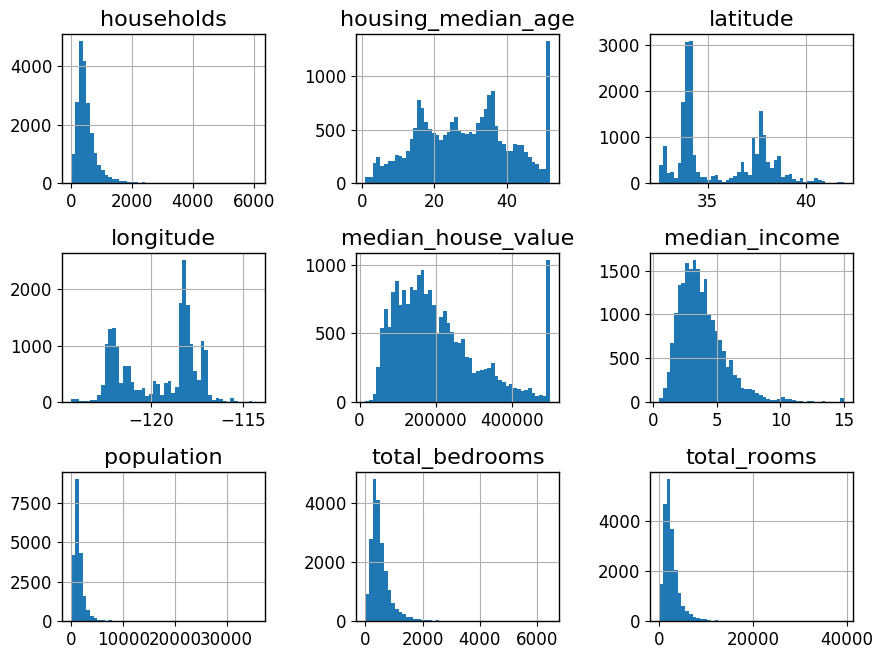

In [6]:
_ = tmp.hist(bins=50, figsize=(9, 9 / (4 / 3.0)))
plt.tight_layout()

Observations: Some of the distributions are tail heavy and we may consider appling a log or square root transformation. Two predictors are capped at a maximum value. The quantaties are of different scales and need to be stardardized or the like. Not only are the distributions tail heavy but clearly there are points that are more then 3 sigma from the mean. These can potentially be removed (or the removal or inclusion can be treated as a hyperparameter).

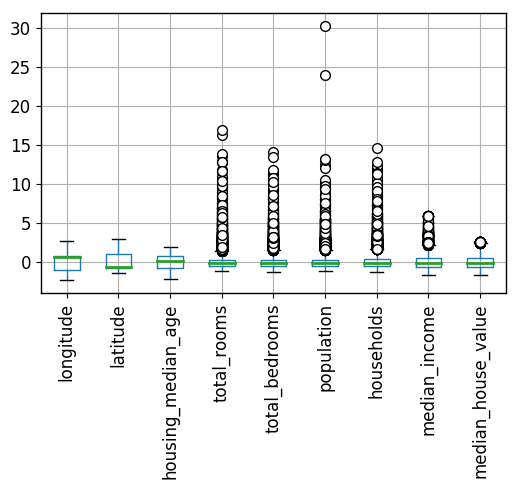

In [7]:
cols = tmp.columns.tolist()
cols.remove('ocean_proximity')
((tmp[cols] - tmp[cols].mean()) / tmp[cols].std()).boxplot(rot=90)

Create a new feature to use to perform the train-test split:

In [8]:
tmp['income_cat'] = np.ceil(tmp['median_income'] / 1.5)
# Return an object whose corresponding entries are from self where cond is True and otherwise are from other
tmp['income_cat'].where(tmp['income_cat'] < 5, other=5.0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f1119d0>]], dtype=object)

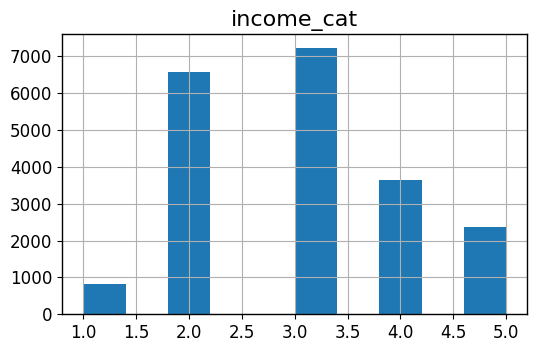

In [9]:
tmp.hist('income_cat')

While the scale is linear we see the distribution is non-uniform. If this were an important feature we would want it to be distributed the same in the train and test partitions.

### Create test set

We are done with the very light EDA of the entire data set. Now we remove the tmp dataframe and construct the train and test sets using hs_all:

In [10]:
from sklearn.model_selection import train_test_split

#hs_all['income_cat'] = tmp.income_cat
strat_train_set, strat_test_set = train_test_split(hs_all, test_size=0.2, random_state=42, stratify=tmp.income_cat)
del tmp

Let's make a copy since we will do some additional playing:

In [11]:
train = strat_train_set.copy()

In [12]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


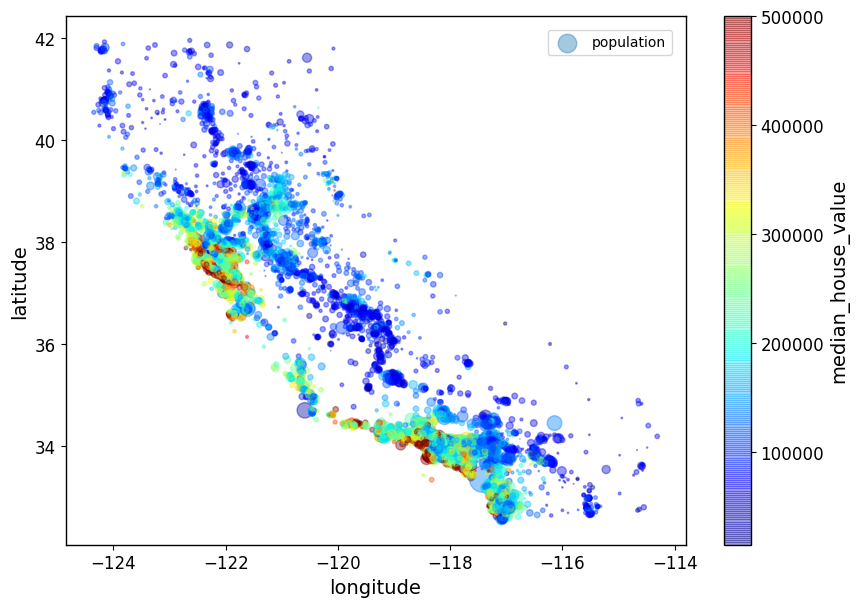

In [13]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=train["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Let's introduce four new features. Later we will need a class that does this since it will be needed for the test set. Recall that train is a copy of the genuine train set.

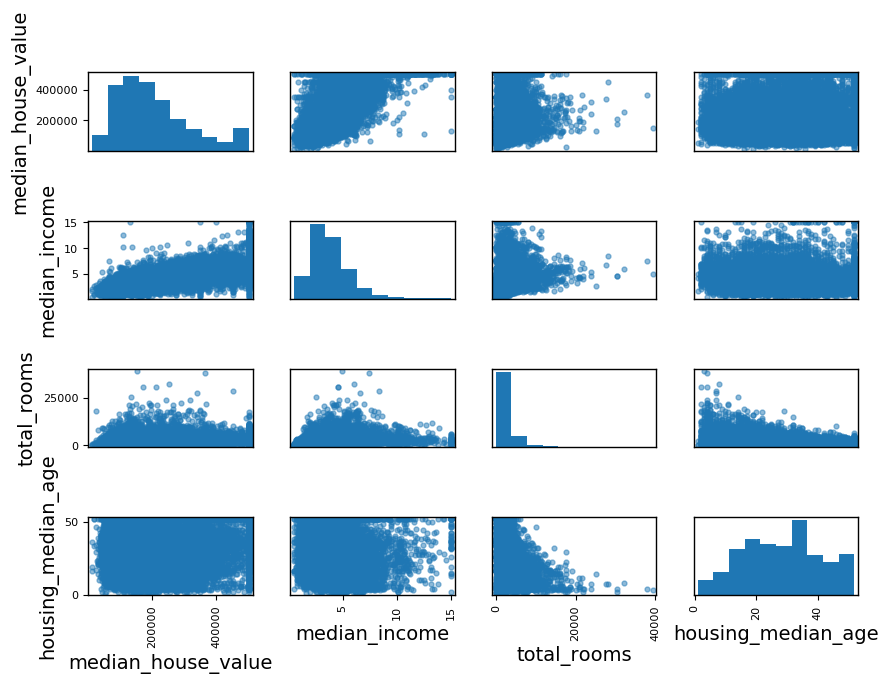

In [14]:
from pandas.tools.plotting import scatter_matrix

atts = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
_ = scatter_matrix(train[atts], figsize=(9, 9 / (4 / 3.0)), marker='.')
plt.tight_layout()

In [15]:
train['rooms_per_household'] = train.total_rooms / train.households
train['bedrooms_per_room'] = train.total_bedrooms / train.total_rooms
train['population_per_household'] = train.population / train.households

In [16]:
corr_mat = train.corr().applymap(lambda x: round(x, 2))
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.00,-0.92,-0.11,0.05,0.08,0.11,0.06,-0.02,-0.05,-0.03,0.10,-0.00
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.12,-0.08,-0.08,-0.14,0.11,-0.12,0.01
housing_median_age,-0.11,0.01,1.00,-0.36,-0.33,-0.30,-0.31,-0.11,0.11,-0.15,0.14,0.02
total_rooms,0.05,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.14,0.13,-0.19,-0.02
total_bedrooms,0.08,-0.07,-0.33,0.93,1.00,0.88,0.98,-0.01,0.05,0.00,0.09,-0.03
population,0.11,-0.12,-0.30,0.86,0.88,1.00,0.90,0.00,-0.03,-0.07,0.04,0.08
households,0.06,-0.08,-0.31,0.92,0.98,0.90,1.00,0.01,0.06,-0.08,0.07,-0.03
median_income,-0.02,-0.08,-0.11,0.20,-0.01,0.00,0.01,1.00,0.69,0.31,-0.62,0.02
median_house_value,-0.05,-0.14,0.11,0.14,0.05,-0.03,0.06,0.69,1.00,0.15,-0.26,-0.02
rooms_per_household,-0.03,0.11,-0.15,0.13,0.00,-0.07,-0.08,0.31,0.15,1.00,-0.40,-0.01


In [17]:
corr_mat['median_house_value'].sort_values()

bedrooms_per_room          -0.26
latitude                   -0.14
longitude                  -0.05
population                 -0.03
population_per_household   -0.02
total_bedrooms              0.05
households                  0.06
housing_median_age          0.11
total_rooms                 0.14
rooms_per_household         0.15
median_income               0.69
median_house_value          1.00
Name: median_house_value, dtype: float64

In [18]:
def notable_pairs(cm, thres=0.5):
     dims = cm.shape[0]
     trips = []
     for i in range(dims - 1):
          for j in range(i + 1, dims):
               trips.append((cm.index[i], cm.columns[j], cm.iloc[i, j]))
     trips.sort(cmp=lambda u, v: cmp(abs(u[2]), abs(v[2])), reverse=True)
     for trip in trips:
          if abs(trip[2]) >= thres: print trip[0], trip[1], round(trip[2], 2)

In [19]:
notable_pairs(corr_mat)

total_bedrooms households 0.98
total_rooms total_bedrooms 0.93
longitude latitude -0.92
total_rooms households 0.92
population households 0.9
total_bedrooms population 0.88
total_rooms population 0.86
median_income median_house_value 0.69
median_income bedrooms_per_room -0.62


We see that bedrooms_per_room and total_value show significant correlation with the target.

### Data cleaning

In [20]:
train[train.total_bedrooms.isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,175000.0,<1H OCEAN,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,287100.0,<1H OCEAN,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,INLAND,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,191000.0,<1H OCEAN,4.866192,NaN,2.468327


We will deal with the null values by imputing using the median. One could use the income_cat to make a more detailed replacement.

### Custom transformers

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix = train.columns.tolist().index('total_rooms')
bedrooms_ix = train.columns.tolist().index('total_bedrooms')
population_ix = train.columns.tolist().index('population')
household_ix = train.columns.tolist().index('households')

In [22]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
     def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
          self.add_bedrooms_per_room = add_bedrooms_per_room
     def fit(self, X, y=None):
          return self
     def transform(self, X, y=None):
          rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
          population_per_household = X[:, population_ix] / X[:, household_ix]
          if self.add_bedrooms_per_room:
               bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
               return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
          else:
               return np.c_[X, rooms_per_household, population_per_household]

In [23]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
     def __init__(self, attribute_names):
          self.attribute_names = attribute_names
     def fit(self, X, y=None):
          return self
     def transform(self, X, y=None):
          return X[self.attribute_names].values

### Pipelines

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer

In [25]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set.median_house_value.copy()

In [26]:
num_attribs = list(housing.columns)
num_attribs.remove('ocean_proximity')
pipeline_num = Pipeline([('dfs', DataFrameSelector(num_attribs)),
                         ('imputer', Imputer(strategy='median')),
                         ('attr_addr', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

In [27]:
cat_attribs = ['ocean_proximity']
pipeline_cat = Pipeline([('dfs', DataFrameSelector(cat_attribs)),
                         ('label_binarizer', LabelBinarizer()),
                         ('std_scaler', StandardScaler())])

In [28]:
full_pipeline = FeatureUnion([('num_pipe', pipeline_num), ('cat_pipe', pipeline_cat)])

Return to the untouched train set:

In [29]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


(16512, 16)

### Training and evaluation on the training set

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
y_pred = lin_reg.predict(housing_prepared)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(housing_labels, y_pred)**0.5, r2_score(housing_labels, y_pred)

(68628.261368397376, 0.64816183657135618)

We see that the RMS error is quite large (even on the training set). Let's plot the residuals:

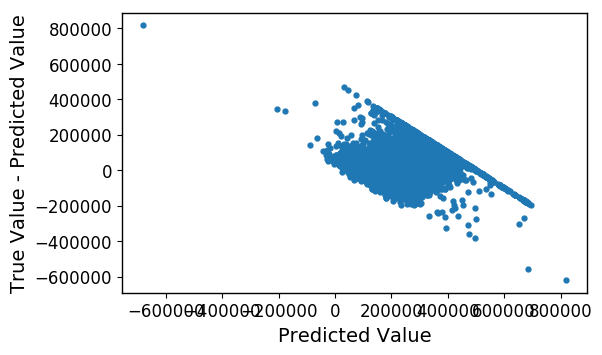

In [32]:
plt.scatter(y_pred, housing_labels - y_pred, marker='.')
plt.xlabel('Predicted Value')
plt.ylabel('True Value - Predicted Value')

Clearly a lot of work is need to improve this model (i.e., cleaning the data). We see that negative predictions are being made, there is a band of data running diagonally at the top of the cluster. The residuals are not randomly scattered about zero.


In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(housing_prepared, housing_labels)
y_pred = rf.predict(housing_prepared)
mean_squared_error(housing_labels, y_pred)**0.5, r2_score(housing_labels, y_pred)

(18785.147579727334, 0.9736387393987429)

In [35]:
rf_scores = cross_val_score(rf, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)
rf_rmse_scores.mean(), rf_rmse_scores.std()

(50206.233269887023, 1930.859854202612)

We see that the model is overfitting in that the training error is much smaller than the cross validation error.

In [36]:
feature_importances = rf.feature_importances_

In [51]:
extra_atts = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_one_hot_att = list(pipeline_cat.named_steps['label_binarizer'].classes_)
atts = num_attribs + extra_atts + cat_one_hot_att

In [38]:
sorted(zip(feature_importances, atts), reverse=True)

[(0.47263269730643032, 'median_income'),
 (0.14080439807899808, 'INLAND'),
 (0.12299806584550135, 'pop_per_hhold'),
 (0.058806927343301334, 'longitude'),
 (0.055992102613644977, 'latitude'),
 (0.044527259973200214, 'housing_median_age'),
 (0.027279753066963921, 'rooms_per_hhold'),
 (0.022992162464809677, 'bedrooms_per_room'),
 (0.013019163488354251, 'total_rooms'),
 (0.012465372495469156, 'households'),
 (0.012262308920639968, 'total_bedrooms'),
 (0.011675528722184201, 'population'),
 (0.002234799797054805, 'NEAR OCEAN'),
 (0.0012907194450282947, '<1H OCEAN'),
 (0.00092704174200534451, 'NEAR BAY'),
 (9.1698696413857112e-05, 'ISLAND')]

<Container object of 16 artists>

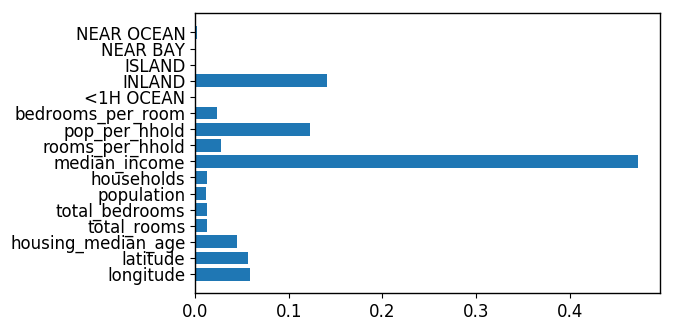

In [39]:
plt.barh(range(len(feature_importances)), feature_importances, tick_label=atts, )

One could continue by trying different ML categories such as SVM and neural nets. The take the best 2 to 5 models and do an intensive hyperparameter optimization. Then pick one model and compute the generalization error using the test set.

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm = SVR()
param_grid = [{'kernel':['linear', 'rbf'], 'C':np.logspace(-2, 2, num=5), 'gamma':np.logspace(-2, 2, num=5)}]
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

In [40]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set.median_house_value.copy()
X_test_prepared = full_pipeline.transform(X_test)
y_test_pred = rf.predict(X_test_prepared)
mean_squared_error(y_test, y_test_pred)**0.5, r2_score(y_test, y_test_pred)

(48256.083426916033, 0.82130805034495769)

We see that the RMS error is quite close to the CV error and the r-squared value is reasonable.

## Part II: Let's try comparing our solution with that of statsmodels

In [60]:
nxt = strat_train_set.drop('median_house_value', axis=1)
nxt_labels = strat_train_set.median_house_value.copy()

In [61]:
num_attribs = list(nxt.columns)
num_attribs.remove('ocean_proximity')
pipeline_num = Pipeline([('dfs', DataFrameSelector(num_attribs)),
                         ('imputer', Imputer(strategy='median')),
                         ('attr_addr', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

In [62]:
nxt_prepared = pipeline_num.fit_transform(nxt)
nxt_prepared.shape

(16512, 11)

In [63]:
nxt_df = pd.DataFrame(nxt_prepared, columns=num_attribs + extra_atts)
nxt_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_hhold,pop_per_hhold,bedrooms_per_room
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928


In [77]:
best_atts = ['median_income', 'pop_per_hhold', 'latitude', 'longitude', 'housing_median_age']
X = nxt_df[best_atts].values
X

array([[-0.61493744, -0.08649871,  0.77194962, -1.15604281,  0.74333089],
       [ 1.33645936, -0.03353391,  0.6596948 , -1.17602483, -1.1653172 ],
       [-0.5320456 , -0.09240499, -1.34218285,  1.18684903,  0.18664186],
       ..., 
       [-0.3167053 , -0.03055414, -0.72478134,  1.58648943, -1.56295222],
       [ 0.09812139,  0.06150916, -0.85106801,  0.78221312,  0.18664186],
       [-0.15779865, -0.09586294,  0.99645926, -1.43579109,  1.85670895]])

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X, nxt_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lin_reg.coef_

array([ 72105.45696779,  -3827.99004294, -94298.04238504, -89950.66583415,
        12312.29891036])

In [80]:
lin_reg.intercept_

206990.92072432154

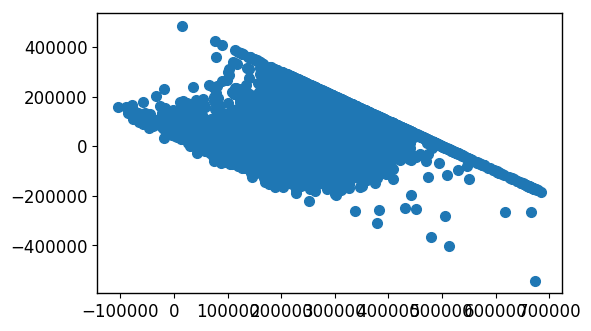

In [84]:
plt.scatter(lin_reg.predict(X), nxt_labels - lin_reg.predict(X))

In [70]:
import statsmodels.api as sm

X = sm.add_constant(X)
regmodel = sm.OLS(nxt_labels, X, missing='none')
result = regmodel.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     4836.
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:40:56   Log-Likelihood:            -2.0849e+05
No. Observations:               16512   AIC:                         4.170e+05
Df Residuals:                   16506   BIC:                         4.170e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.07e+05    573.593    360.867      0.0